# Preprocessing Data Train

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kendaraan_train.csv')
df

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


<h3>Data Understanding</h3>

In [3]:
# deskripsi statistik

df.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
# cek tipe data dari tiap kolom

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [5]:
df.shape

(285831, 12)

<h3>Identifikasi variabel kategorik dan numerik</h3>

kategorik :
<ul>
<li>id</li>
<li>Jenis_Kelamin</li> 
<li>SIM </li> 
<li>Kode_Daerah </li> 
<li>Sudah_Asuransi </li> 
<li>Kendaraan_Rusak </li> 
<li>Kanal_Penjualan </li> 
<li>Tertarik </li> 
</ul>

numerik:
<ul>
<li>Umur</li> 
<li>Premi</li> 
<li>Lama_Berlangganan</li> 
</ul>

<h3> Drop column id </h3>

In [6]:
# drop unused column (id)

df_drop = df.drop(['id'],1)

<h3> Transformasi Data </h3>

In [7]:
# mapping jenis_kelamin, umur_kendaraan, Kendaraan_rusak

df_drop['Jenis_Kelamin'] = df_drop['Jenis_Kelamin'].map({"Pria":0,
                                                 "Wanita":1})

df_drop['Umur_Kendaraan'] = df_drop['Umur_Kendaraan'].map({"< 1 Tahun":0,
                                                 "1-2 Tahun":1,
                                                 "> 2 Tahun":2})

df_drop['Kendaraan_Rusak'] = df_drop['Kendaraan_Rusak'].map({"Tidak":0,
                                                 "Pernah":1})

In [8]:
# hasil mapping

df_drop[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']]

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,1.0,0.0,0.0
1,0.0,2.0,1.0
2,NaN,0.0,0.0
3,1.0,1.0,0.0
4,0.0,2.0,NaN
...,...,...,...
285826,1.0,0.0,0.0
285827,1.0,0.0,0.0
285828,1.0,0.0,0.0
285829,0.0,1.0,0.0


<h3> Identifikasi dan Handling Missing Value </h3>

In [9]:
# Cek missing values

df_drop.isna().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [10]:
# buat list untuk variabe numerik dan kategorik

list_numerik = ['Umur','Premi','Lama_Berlangganan']
list_kategorik = [x for x in df_drop.axes[1].tolist() if x not in list_numerik]

In [11]:
#mereplace semua missing value variabel numerik dengan nilai rata-rata variabel tsb.

for i in list_numerik:
    df_drop[i].fillna(round(df_drop[i].median()),inplace=True)

In [12]:
#mereplace semua missing value variabel kategorikal dengan nilai modus variabel tsb.

for j in list_kategorik:
    df_drop[j].fillna(df_drop[j].mode()[0],inplace=True)

In [13]:
# cek kembali missing value

df_drop.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

sudah dapat dilihat bahwa tidak ada lagi missing value di setiap kolom

<h3>Identifikasi dan Handling Outliers</h3>

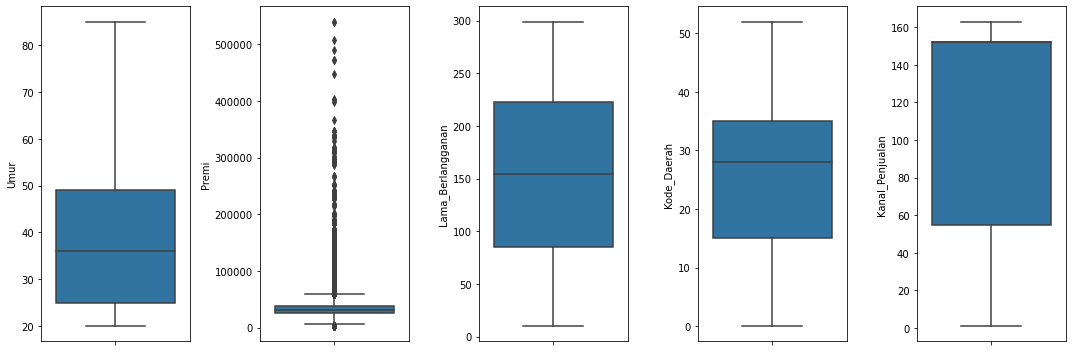

In [14]:
# Cek Variabel Numerik dan Kategorik yang memiliki nilai continu

fig, axs = plt.subplots(1,5, figsize = (15,5))

plt1 = sns.boxplot(y=df_drop['Umur'], ax = axs[0])
plt2 = sns.boxplot(y=df_drop['Premi'], ax = axs[1])
plt3 = sns.boxplot(y=df_drop['Lama_Berlangganan'], ax = axs[2])
plt4 = sns.boxplot(y=df_drop['Kode_Daerah'], ax = axs[3])
plt5 = sns.boxplot(y=df_drop['Kanal_Penjualan'], ax = axs[4])

plt.tight_layout()

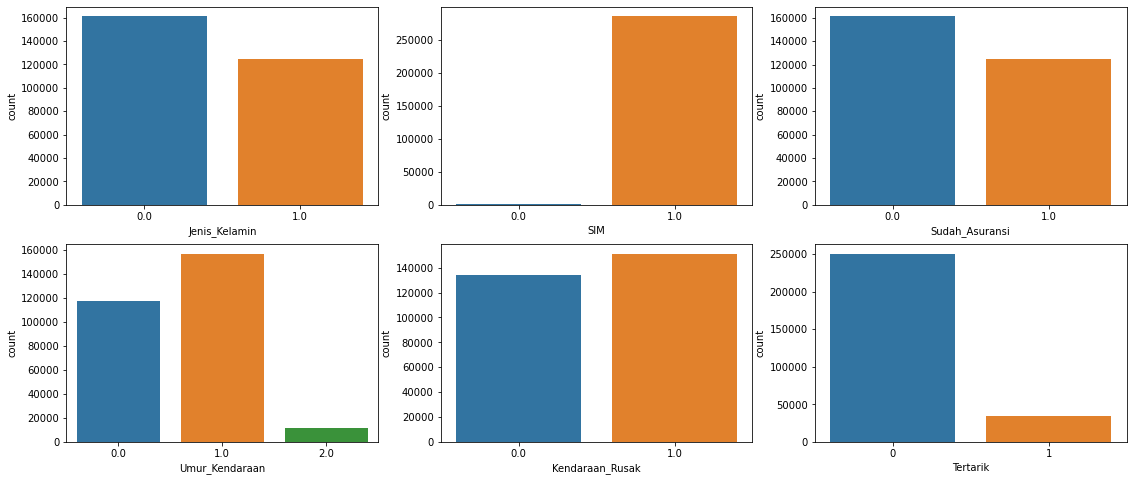

In [15]:
# Cek Variabel Kategorikal data nominal

fig2, axs2 = plt.subplots(2,3, figsize = (19,8))

plt6 = sns.countplot(x=df_drop['Jenis_Kelamin'], ax = axs2[0,0])
plt7 = sns.countplot(x=df_drop['SIM'], ax = axs2[0,1])
plt8 = sns.countplot(x=df_drop['Sudah_Asuransi'], ax = axs2[0,2])
plt9 = sns.countplot(x=df_drop['Umur_Kendaraan'], ax = axs2[1,0])
plt10 = sns.countplot(x=df_drop['Kendaraan_Rusak'], ax = axs2[1,1])
plt11 = sns.countplot(x=df_drop['Tertarik'], ax = axs2[1,2])

plt.show()

In [16]:
#fungsi mencari nilai lower bound dan upper bound dari suatu dataframe

def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lb = q1 - (iqr*1.5)
    ub = q3 + (iqr*1.5)
    return lb,ub

In [17]:
#fungsi mencari outliers dari suatu dataframe

def get_outliers_iqr(x):
    lb,ub = get_lower_upper_bound(x)
    return x[np.where((x>ub) | (x<lb))]

In [18]:
# cek banyaknya outliers di setiap variabel

for i in df_drop:
    print("banyaknya outliers dari variabel",i,":",len(get_outliers_iqr(df_drop[i].values)))

banyaknya outliers dari variabel Jenis_Kelamin : 0
banyaknya outliers dari variabel Umur : 0
banyaknya outliers dari variabel SIM : 584
banyaknya outliers dari variabel Kode_Daerah : 0
banyaknya outliers dari variabel Sudah_Asuransi : 0
banyaknya outliers dari variabel Umur_Kendaraan : 0
banyaknya outliers dari variabel Kendaraan_Rusak : 0
banyaknya outliers dari variabel Premi : 55141
banyaknya outliers dari variabel Kanal_Penjualan : 0
banyaknya outliers dari variabel Lama_Berlangganan : 0
banyaknya outliers dari variabel Tertarik : 35006


In [19]:
# drop outliers with iqr

def remove_outliers_iqr(df):
    Lb,Ub = get_lower_upper_bound(df)
    df_final = df[(df>=Lb) & (df<=Ub)]
    return df_final

In [20]:
# remove outliers

removed_outliers = df_drop.copy()

removed_outliers['Premi'] = remove_outliers_iqr(df_drop['Premi'].copy())

removed_outliers

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,0.0,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,0.0,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,1.0,58.0,1.0,48.0,0.0,1.0,0.0,NaN,124.0,63.0,0
4,0.0,50.0,1.0,35.0,0.0,2.0,1.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1.0,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,1.0,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,1.0,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,0.0,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [21]:
# setelah dilakukan handling outliers, lakukan pengecekan missing value

removed_outliers.isna().sum()

Jenis_Kelamin            0
Umur                     0
SIM                      0
Kode_Daerah              0
Sudah_Asuransi           0
Umur_Kendaraan           0
Kendaraan_Rusak          0
Premi                55141
Kanal_Penjualan          0
Lama_Berlangganan        0
Tertarik                 0
dtype: int64

In [22]:
# drop missing value

removed_outliers.dropna(inplace=True)

In [23]:
# cek kembali missing value

removed_outliers.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<h3>Feature Engineering - Scalling Method with MinMaxScaler</h3>

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(removed_outliers.astype(float)), columns=removed_outliers.columns)
df_scaled

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.409000,0.932099,0.301038,0.0
1,0.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.367431,0.172840,0.512111,0.0
2,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.496727,0.981481,0.377163,0.0
3,0.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.536338,0.537037,0.636678,0.0
4,0.0,0.015385,1.0,0.673077,1.0,0.0,0.0,0.310270,0.932099,0.557093,0.0
...,...,...,...,...,...,...,...,...,...,...,...
230685,1.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.370937,0.932099,0.716263,0.0
230686,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.719643,0.932099,0.138408,0.0
230687,1.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.814103,0.932099,0.747405,0.0
230688,0.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.455139,0.759259,0.899654,0.0


# Preprocessing Data Test

In [25]:
df_test = pd.read_csv('kendaraan_test.csv')
df_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


<h3>Transformasi Data</h3>

In [26]:
# mapping jenis_kelamin, umur_kendaraan, Kendaraan_rusak

df_test['Jenis_Kelamin'] = df_test['Jenis_Kelamin'].map({"Pria":0,
                                                 "Wanita":1})

df_test['Umur_Kendaraan'] = df_test['Umur_Kendaraan'].map({"< 1 Tahun":0,
                                                 "1-2 Tahun":1,
                                                 "> 2 Tahun":2})

df_test['Kendaraan_Rusak'] = df_test['Kendaraan_Rusak'].map({"Tidak":0,
                                                 "Pernah":1})

In [27]:
# hasil mapping

df_test[['Jenis_Kelamin','Umur_Kendaraan','Kendaraan_Rusak']]

,Jenis_Kelamin,Umur_Kendaraan,Kendaraan_Rusak
0,1,1,1
1,0,0,0
2,0,0,0
3,0,1,0
4,0,1,1
...,...,...,...
47634,0,2,1
47635,0,1,1
47636,0,0,0
47637,0,1,1


<h3>Identifikasi dan Handling Missing Value</h3>

In [28]:
df_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<h3>Identifikasi dan Handling Outlier</h3>

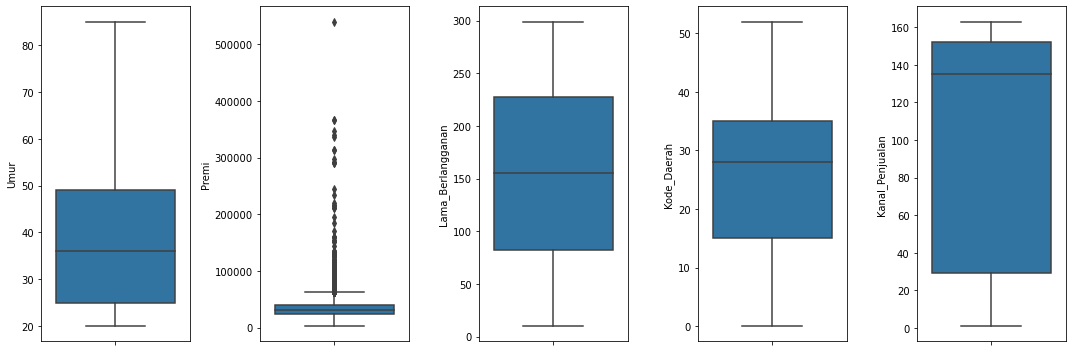

In [29]:
fig3, axs3 = plt.subplots(1,5, figsize = (15,5))

plt12 = sns.boxplot(y=df_test['Umur'], ax = axs3[0])
plt13 = sns.boxplot(y=df_test['Premi'], ax = axs3[1])
plt14 = sns.boxplot(y=df_test['Lama_Berlangganan'], ax = axs3[2])
plt15 = sns.boxplot(y=df_test['Kode_Daerah'], ax = axs3[3])
plt16 = sns.boxplot(y=df_test['Kanal_Penjualan'], ax = axs3[4])

plt.tight_layout()

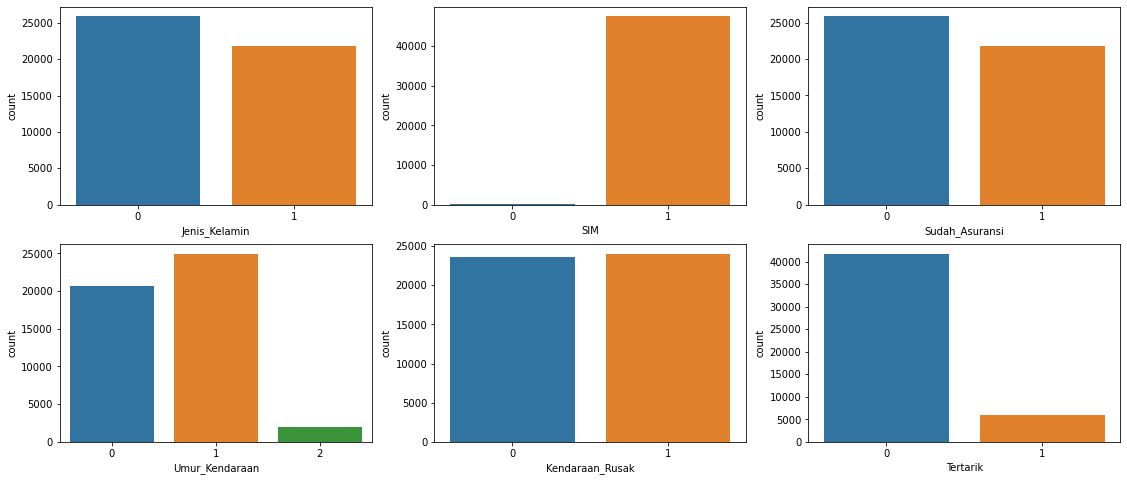

In [30]:
# Cek Variabel Kategorikal data nominal

fig4, axs4 = plt.subplots(2,3, figsize = (19,8))

plt6 = sns.countplot(x=df_test['Jenis_Kelamin'], ax = axs4[0,0])
plt7 = sns.countplot(x=df_test['SIM'], ax = axs4[0,1])
plt8 = sns.countplot(x=df_test['Sudah_Asuransi'], ax = axs4[0,2])
plt9 = sns.countplot(x=df_test['Umur_Kendaraan'], ax = axs4[1,0])
plt10 = sns.countplot(x=df_test['Kendaraan_Rusak'], ax = axs4[1,1])
plt11 = sns.countplot(x=df_test['Tertarik'], ax = axs4[1,2])

plt.show()

In [31]:
# cek banyaknya outliers di setiap variabel di data test

for i in df_test:
    print("banyaknya outliers dari variabel",i,":",len(get_outliers_iqr(df_test[i].values)))

banyaknya outliers dari variabel Jenis_Kelamin : 0
banyaknya outliers dari variabel Umur : 0
banyaknya outliers dari variabel SIM : 99
banyaknya outliers dari variabel Kode_Daerah : 0
banyaknya outliers dari variabel Sudah_Asuransi : 0
banyaknya outliers dari variabel Umur_Kendaraan : 0
banyaknya outliers dari variabel Kendaraan_Rusak : 0
banyaknya outliers dari variabel Premi : 1271
banyaknya outliers dari variabel Kanal_Penjualan : 0
banyaknya outliers dari variabel Lama_Berlangganan : 0
banyaknya outliers dari variabel Tertarik : 5861


In [32]:
# remove outliers

removed_outliers_test = df_test.copy()

removed_outliers_test['Premi'] = remove_outliers_iqr(df_test['Premi'].copy())

removed_outliers_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,49,1,8,0,1,1,46963.0,26,145,0
1,0,22,1,47,1,0,0,39624.0,152,241,0
2,0,24,1,28,1,0,0,NaN,152,62,0
3,0,46,1,8,1,1,0,36266.0,124,34,0
4,0,35,1,23,0,1,1,26963.0,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61,1,46,0,2,1,31039.0,124,67,0
47635,0,41,1,15,0,1,1,2630.0,157,232,0
47636,0,24,1,29,1,0,0,33101.0,152,211,0
47637,0,59,1,30,0,1,1,37788.0,26,239,1


In [33]:
# setelah dilakukan handling outliers, lakukan pengecekan missing value

removed_outliers_test.isna().sum()

Jenis_Kelamin           0
Umur                    0
SIM                     0
Kode_Daerah             0
Sudah_Asuransi          0
Umur_Kendaraan          0
Kendaraan_Rusak         0
Premi                1271
Kanal_Penjualan         0
Lama_Berlangganan       0
Tertarik                0
dtype: int64

In [34]:
# drop missing values

removed_outliers_test.dropna(inplace=True)

In [35]:
# cek kemabali missing value

removed_outliers_test.isna().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

<h3>Feature Engineering - Scalling Method with Min Max Scaler</h3>

In [36]:
df_scaled_test = pd.DataFrame(scaler.fit_transform(removed_outliers_test.astype(float)), columns=removed_outliers_test.columns)
df_scaled_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.446154,1.0,0.153846,0.0,0.5,1.0,0.745581,0.154321,0.467128,0.0
1,0.0,0.030769,1.0,0.903846,1.0,0.0,0.0,0.622156,0.932099,0.799308,0.0
2,0.0,0.400000,1.0,0.153846,1.0,0.5,0.0,0.565682,0.759259,0.083045,0.0
3,0.0,0.230769,1.0,0.442308,0.0,0.5,1.0,0.409226,0.932099,0.757785,0.0
4,0.0,0.092308,1.0,0.538462,1.0,0.0,0.0,0.674240,0.932099,0.650519,0.0
...,...,...,...,...,...,...,...,...,...,...,...
46363,0.0,0.630769,1.0,0.884615,0.0,1.0,1.0,0.477775,0.759259,0.197232,0.0
46364,0.0,0.323077,1.0,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
46365,0.0,0.061538,1.0,0.557692,1.0,0.0,0.0,0.512454,0.932099,0.695502,0.0
46366,0.0,0.600000,1.0,0.576923,0.0,0.5,1.0,0.591278,0.154321,0.792388,1.0


<h3>Data Splitting</h3>

In [37]:
from sklearn.model_selection import train_test_split

x = df_scaled.drop('Tertarik',1)
y = df_scaled['Tertarik']

x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=42)

x_test = df_scaled_test.drop('Tertarik',1)
y_test = df_scaled_test['Tertarik']

In [38]:
x_train.shape, y_train.shape

((184552, 10), (184552,))

In [39]:
x_validation.shape, y_validation.shape

((46138, 10), (46138,))

In [40]:
x_test.shape, y_test.shape

((46368, 10), (46368,))

# Classification Model

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

list_accuracy = []

### Model 1 (Decision Tree Classifier)

In [42]:
from sklearn.tree import DecisionTreeClassifier

model_ID3 = DecisionTreeClassifier()
model_ID3.fit(x_train, y_train)
y_pred_ID3 = model_ID3.predict(x_validation)

list_accuracy.append(accuracy_score(y_validation, y_pred_ID3))
print('Accuracy Score :',accuracy_score(y_validation, y_pred_ID3))

Accuracy Score : 0.828145996792232


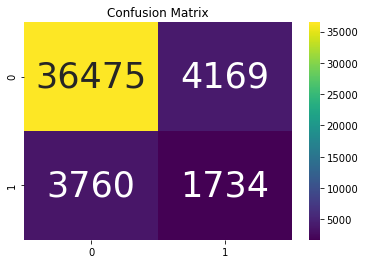

In [43]:
matrix = confusion_matrix(y_validation, y_pred_ID3) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [44]:
print('Classification Report : ')
print(classification_report(y_validation, y_pred_ID3))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.91      0.90      0.90     40644
         1.0       0.29      0.32      0.30      5494

    accuracy                           0.83     46138
   macro avg       0.60      0.61      0.60     46138
weighted avg       0.83      0.83      0.83     46138



### Model 2 (K-Nearest Neighbors Classifier)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train, y_train)
y_pred_KNN = model_KNN.predict(x_validation)

list_accuracy.append(accuracy_score(y_validation, y_pred_KNN))
print('Accuracy Score :',accuracy_score(y_validation, y_pred_KNN))

Accuracy Score : 0.8579478954441024


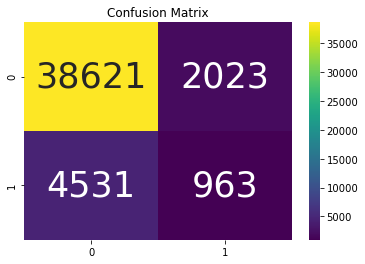

In [46]:
matrix = confusion_matrix(y_validation, y_pred_KNN) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [47]:
print('Classification Report : ')
print(classification_report(y_validation, y_pred_KNN))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     40644
         1.0       0.32      0.18      0.23      5494

    accuracy                           0.86     46138
   macro avg       0.61      0.56      0.57     46138
weighted avg       0.83      0.86      0.84     46138



### Model 3 (Random Forest Classifier)

In [48]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_validation)
list_accuracy.append(accuracy_score(y_validation, y_pred_RF))
print('Accuracy Score :',accuracy_score(y_validation, y_pred_RF))

Accuracy Score : 0.8700420477697343


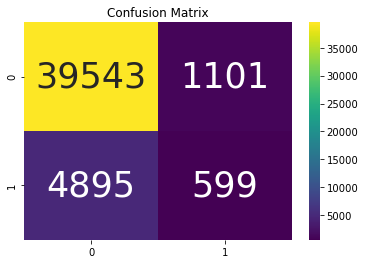

In [49]:
matrix = confusion_matrix(y_validation, y_pred_RF) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [50]:
print('Classification Report : ')
print(classification_report(y_validation, y_pred_RF))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     40644
         1.0       0.35      0.11      0.17      5494

    accuracy                           0.87     46138
   macro avg       0.62      0.54      0.55     46138
weighted avg       0.83      0.87      0.84     46138



In [51]:
list_model = ['Decision Tree', 'K-Nearest Neighbors', 'Random Forest']
df_acc = pd.DataFrame(list_model, columns =['Model'])
df_acc['Accuracy'] = list_accuracy

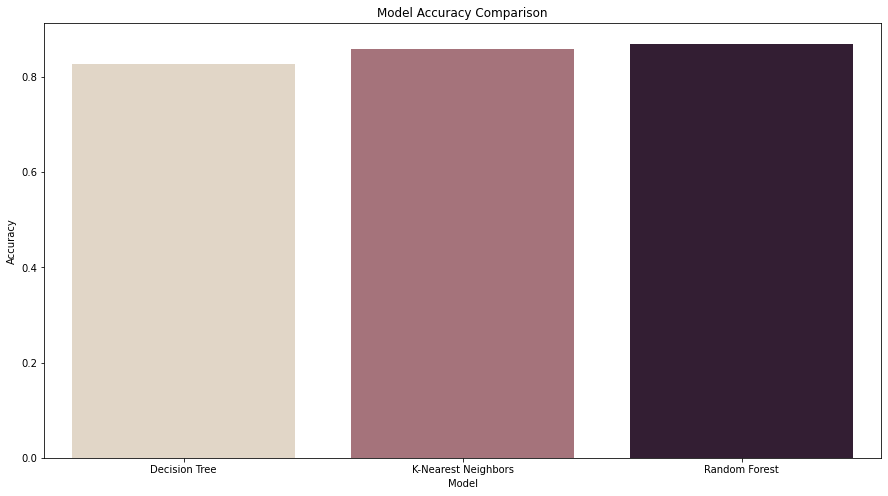

In [52]:
plt.figure(figsize=(15, 8))
sns.barplot(x='Model', y='Accuracy', palette="ch:.25", data=df_acc).set_title('Model Accuracy Comparison')
plt.show()

# Model Selection and Evaluation

In [53]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model_RF, x_train, y_train, cv=5)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.87036385 0.86919888 0.86930371 0.87038743 0.87101057]
0.8700528877662856


In [54]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

print('Accuracy Score :',accuracy_score(y_test, y_pred_RF))

Accuracy Score : 0.8646911663216011


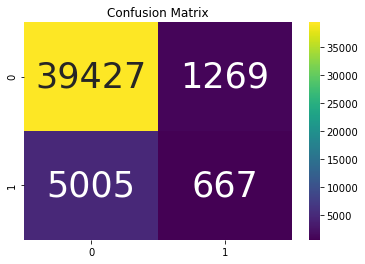

In [55]:
matrix = confusion_matrix(y_test, y_pred_RF) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [56]:
print('Classification Report : ')
print(classification_report(y_test, y_pred_RF))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     40696
         1.0       0.34      0.12      0.18      5672

    accuracy                           0.86     46368
   macro avg       0.62      0.54      0.55     46368
weighted avg       0.82      0.86      0.83     46368



In [57]:
removed_outliers_test['Prediksi'] = y_pred_RF
removed_outliers_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik,Prediksi
0,1,49,1,8,0,1,1,46963.0,26,145,0,0.0
1,0,22,1,47,1,0,0,39624.0,152,241,0,0.0
3,0,46,1,8,1,1,0,36266.0,124,34,0,0.0
4,0,35,1,23,0,1,1,26963.0,152,229,0,0.0
5,0,26,1,28,1,0,0,42721.0,152,198,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47634,0,61,1,46,0,2,1,31039.0,124,67,0,0.0
47635,0,41,1,15,0,1,1,2630.0,157,232,0,0.0
47636,0,24,1,29,1,0,0,33101.0,152,211,0,0.0
47637,0,59,1,30,0,1,1,37788.0,26,239,1,0.0


In [58]:
removed_outliers_test.to_csv('Result.csv', index=False)

# Classification Without Outliers Handling

In [59]:
scaler = MinMaxScaler()
df_scaled2 = pd.DataFrame(scaler.fit_transform(df_drop.astype(float)), columns=df_drop.columns)
df_scaled2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.153846,1.0,0.634615,1.0,0.0,0.0,0.047251,0.932099,0.301038,0.0
1,0.0,0.430769,1.0,0.750000,0.0,1.0,1.0,0.043104,0.172840,0.512111,0.0
2,0.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.056002,0.981481,0.377163,0.0
3,1.0,0.584615,1.0,0.923077,0.0,0.5,0.0,0.000000,0.759259,0.183391,0.0
4,0.0,0.461538,1.0,0.673077,0.0,1.0,1.0,0.059953,0.537037,0.636678,0.0
...,...,...,...,...,...,...,...,...,...,...,...
285826,1.0,0.046154,1.0,0.076923,1.0,0.0,0.0,0.043454,0.932099,0.716263,0.0
285827,1.0,0.015385,1.0,0.884615,1.0,0.0,0.0,0.078239,0.932099,0.138408,0.0
285828,1.0,0.046154,1.0,0.961538,1.0,0.0,0.0,0.087661,0.932099,0.747405,0.0
285829,0.0,0.738462,1.0,0.134615,1.0,0.5,0.0,0.051853,0.759259,0.899654,0.0


In [60]:
df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test.astype(float)), columns=df_test.columns)
df_test_scaled

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1.0,0.446154,1.0,0.153846,0.0,0.5,1.0,0.082475,0.154321,0.467128,0.0
1,0.0,0.030769,1.0,0.903846,1.0,0.0,0.0,0.068822,0.932099,0.799308,0.0
2,0.0,0.061538,1.0,0.538462,1.0,0.0,0.0,0.200636,0.932099,0.179931,0.0
3,0.0,0.400000,1.0,0.153846,1.0,0.5,0.0,0.062575,0.759259,0.083045,0.0
4,0.0,0.230769,1.0,0.442308,0.0,0.5,1.0,0.045268,0.932099,0.757785,0.0
...,...,...,...,...,...,...,...,...,...,...,...
47634,0.0,0.630769,1.0,0.884615,0.0,1.0,1.0,0.052851,0.759259,0.197232,0.0
47635,0.0,0.323077,1.0,0.288462,0.0,0.5,1.0,0.000000,0.962963,0.768166,0.0
47636,0.0,0.061538,1.0,0.557692,1.0,0.0,0.0,0.056687,0.932099,0.695502,0.0
47637,0.0,0.600000,1.0,0.576923,0.0,0.5,1.0,0.065406,0.154321,0.792388,1.0


In [61]:
x_train = df_scaled2.drop('Tertarik',1)
y_train = df_scaled2['Tertarik']

x_test = df_test_scaled.drop('Tertarik',1)
y_test = df_test_scaled['Tertarik']

In [62]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train, y_train)
y_pred_RF = model_RF.predict(x_test)

print('Accuracy Score :',accuracy_score(y_test, y_pred_RF))

Accuracy Score : 0.8664749469972082


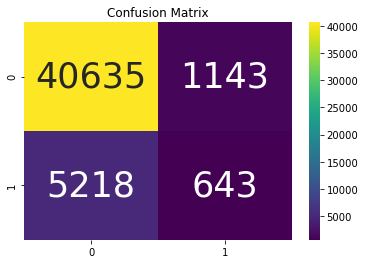

In [63]:
matrix = confusion_matrix(y_test, y_pred_RF) 
sns.heatmap(data=matrix,cmap="viridis",annot=True,fmt=".0f",annot_kws={"size":35},).set_title('Confusion Matrix')
plt.show()

In [64]:
print('Classification Report : ')
print(classification_report(y_test, y_pred_RF))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93     41778
         1.0       0.36      0.11      0.17      5861

    accuracy                           0.87     47639
   macro avg       0.62      0.54      0.55     47639
weighted avg       0.82      0.87      0.83     47639

